In [11]:
# Dependencies
import requests
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import math

In [12]:
# Use Pandas to read data
Food_data_file_df = pd.read_csv("data/FoodData.csv")
Food_data_file_df.head(10)

,Class,Type,Group,Food,Allergy
0,Plant origin,Nut and seed,Oil seed,Almond,Nut Allergy
1,Plant origin,Fruit,Pome fruit,Apple,Oral Allergy Syndrome
2,Plant origin,Fruit,Stone fruit,Apricot,Stone Fruit Allergy
3,Plant origin,Vegetable,Composite vegetable,Artichoke,Insulin Allergy
4,Plant origin,Vegetable,Liliaceous vegetable,Asparagus,Allium Allergy
5,Plant origin,Fruit,Tropical fruit,Avocado,Oral Allergy Syndrome
6,Plant origin,Vegetable,Miscellaneous vegetable,Bamboo shoot,Histamine Allergy
7,Plant origin,Fruit,Tropical fruit,Banana,Banana Allergy
8,Plant origin,Cereal grain and pulse,Cereal grain,Barley,Gluten Allergy
9,Plant origin,Cereal grain and pulse,Pulse,Bean,Legume Allergy


In [13]:
# The unique method shows every element only once
unique = Food_data_file_df["Type"].unique()
unique

array(['Nut and seed', 'Fruit', 'Vegetable', 'Cereal grain and pulse',
       'Aquatic animal', 'Dairy', 'Oil', 'Terrestrial mammal', 'Poultry',
       'Bee product', 'Hop', 'Mineral water', 'Spice and herb', 'Tea'],
      dtype=object)

In [14]:
# Get a count of food by category
count = Food_data_file_df["Type"].value_counts()
count

Vegetable                 64
Fruit                     34
Cereal grain and pulse    21
Aquatic animal            14
Nut and seed              12
Dairy                     11
Oil                       10
Terrestrial mammal         6
Poultry                    4
Spice and herb             3
Bee product                2
Hop                        1
Mineral water              1
Tea                        1
Name: Type, dtype: int64

In [15]:
# Get a list of all unique food items
unique = Food_data_file_df["Food"].unique()
unique

array(['Almond', 'Apple', 'Apricot', 'Artichoke', 'Asparagus', 'Avocado',
       'Bamboo shoot', 'Banana', 'Barley', 'Bean', 'Blackberry',
       'Black-eyed bean', 'Blueberry', 'Bonito', 'Broad bean', 'Broccoli',
       'Brussels sprouts', 'Buckwheat', 'Burdock', 'Butter',
       'Butter bean', 'Buttermilk', 'Button mushroom', 'Cabbage',
       'Cacao bean', 'Canola oil', 'Carrot', 'Casein', 'Cattle',
       'Cauliflower', 'Celery', 'Cheese', 'Cherry', 'Chestnut', 'Chicken',
       'Chicory', 'Chinese cabbage', 'Coconut oil', 'Coffee bean', 'Corn',
       'Corn oil', 'Cotton seed', 'Cranberry', 'Cream', 'Crustaceans',
       'Cucumber ', 'Custard', 'Date', 'Deer', 'Duck', 'Eel', 'Egg plant',
       'Eggs', 'Endive', 'Fructose', 'Garlic', 'Ghrkin', 'Ginger',
       'Ginkgo nut', 'Globfish', 'Glucose', 'Goat', 'Grape', 'Grapefruit',
       'Grapeseed oil', 'Green soybean', 'Groundnut oil', 'Guava',
       'Honey', 'Hop', 'Horse', 'Horse Mackerel', 'Horseradish',
       'Huckleberry', 'I

In [16]:
unique_group = Food_data_file_df["Group"].unique()
unique_group

array(['Oil seed', 'Pome fruit', 'Stone fruit', 'Composite vegetable',
       'Liliaceous vegetable', 'Tropical fruit',
       'Miscellaneous vegetable', 'Cereal grain', 'Pulse', 'Berry',
       'Fish', 'Cruciferous vegetable', 'Dairy', 'Mushroom',
       'Beverage seed', 'Oil', 'Umbelliferous vegetable', 'Offal',
       'Shellfish', 'Cucurbitaceous vegetable', 'Solanceous vegetable',
       'Egg', 'Sugar source', 'Grape', 'Citrus fruit / citric acid',
       'Legumes vegetable', 'Bee product', 'Hop', 'Potato',
       'Mineral water', 'Herb', 'Spice', 'Tea'], dtype=object)

In [17]:
count_group = Food_data_file_df["Group"].value_counts()
count_group

Cruciferous vegetable         15
Pulse                         13
Fish                          12
Dairy                         11
Oil seed                      10
Oil                           10
Tropical fruit                10
Offal                          9
Cereal grain                   8
Composite vegetable            7
Liliaceous vegetable           7
Stone fruit                    7
Cucurbitaceous vegetable       7
Berry                          6
Sugar source                   6
Potato                         5
Umbelliferous vegetable        5
Citrus fruit / citric acid     5
Pome fruit                     5
Miscellaneous vegetable        4
Legumes vegetable              3
Solanceous vegetable           3
Beverage seed                  2
Herb                           2
Shellfish                      2
Bee product                    2
Mushroom                       2
Mineral water                  1
Grape                          1
Tea                            1
Hop       

In [18]:
count = Food_data_file_df["Class"].value_counts()
count

Plant origin      146
Animal origin      37
Mineral waters      1
Name: Class, dtype: int64

In [19]:
unique = Food_data_file_df["Allergy"].unique()
unique

array(['Nut Allergy', 'Oral Allergy Syndrome', 'Stone Fruit Allergy',
       'Insulin Allergy', 'Allium Allergy', 'Histamine Allergy',
       'Banana Allergy', 'Gluten Allergy', 'Legume Allergy',
       'Salicylate Allergy', 'Broccoli allergy', 'Cruciferous Allergy',
       'Ragweed Allergy', 'Milk allergy / Lactose intolerance',
       'Mushroom Allergy', nan, 'Hypersensitivity', 'Alpha-gal Syndrome',
       'Poultry Allergy', 'Ochratoxin Allergy', 'Corn Allergy',
       'Seed Allergy', 'Shellfish Allergy', 'Fish Allergy',
       'Nightshade Allergy', 'Sugar Allergy / Intolerance', 'LTP Allergy',
       'Citrus Allergy', 'Honey Allergy', 'Beer Allergy',
       'Potato Allergy', 'Lactose Intolerance', 'Aquagenic Urticaria',
       'Peanut Allergy', 'Mint Allergy', 'Rice Allergy', 'Pepper Allergy',
       'Soy Allergy', 'Tannin Allergy', 'Thyroid'], dtype=object)

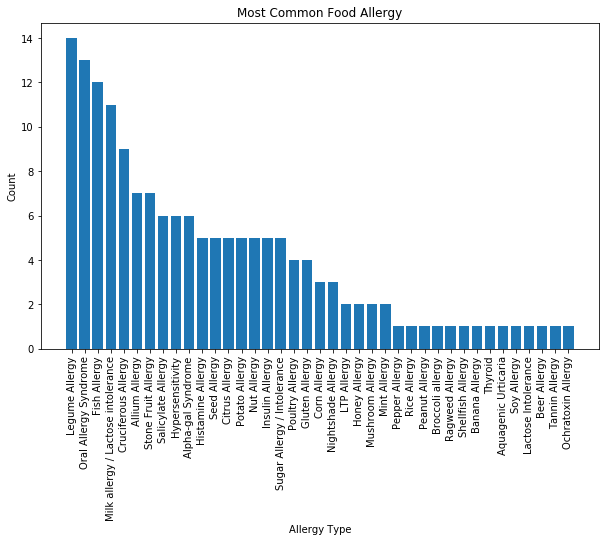

In [20]:
# Graph out most common Food Allergy
allergy_counts = Food_data_file_df["Allergy"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(allergy_counts.index, allergy_counts.values)
plt.xlabel("Allergy Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Most Common Food Allergy")

plt.show()

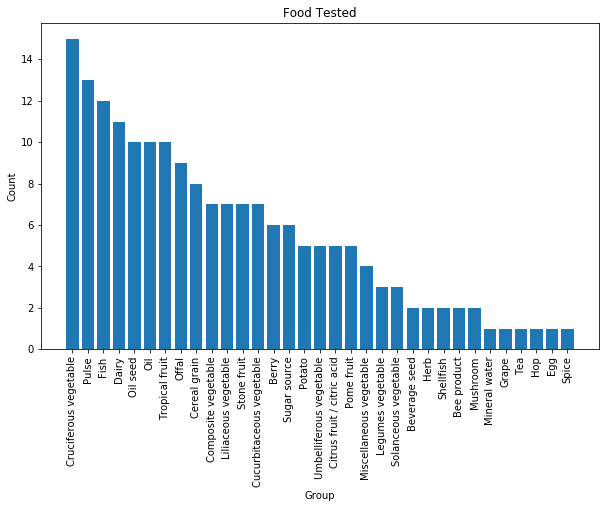

In [21]:
# Most common food group in study
allergy_counts = Food_data_file_df["Group"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(allergy_counts.index, allergy_counts.values)
plt.xlabel("Group")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Food Tested")
plt.show()

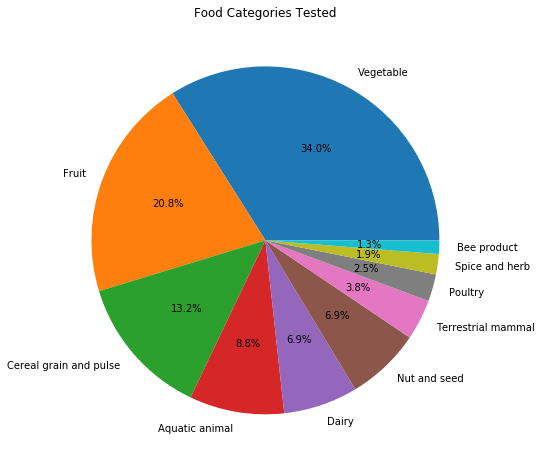

In [28]:
#Group data by food type
#Group data by allergy
grouped = Food_data_file_df.groupby(["Type", "Allergy"]).size().reset_index(name="count")
grouped = grouped[grouped["count"]>0]
grouped = grouped.groupby(["Type"])["count"].sum().reset_index(name="Total Count")

# sort the data by total count in descending order
grouped = grouped.sort_values('Total Count', ascending=False)

# create a pie chart of the top 10 food types with the highest total count of allergies
top10 = grouped.head(10)
plt.figure(figsize=(12,8))
plt.pie(top10['Total Count'], labels=top10['Type'], autopct='%1.1f%%')
plt.title("Food Categories Tested")
plt.show()


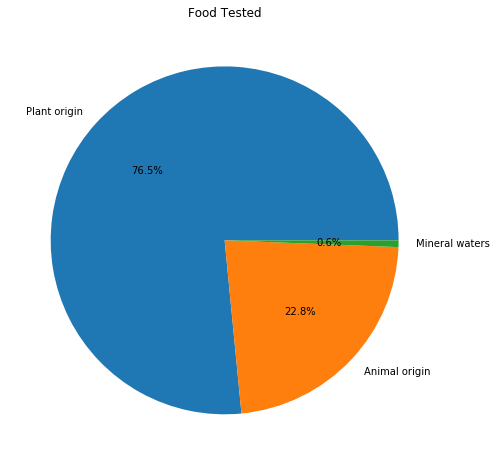

In [29]:
#Group data by class type
#Group data by allergy
grouped = Food_data_file_df.groupby(["Class", "Allergy"]).size().reset_index(name="count")
grouped = grouped[grouped["count"]>0]
grouped = grouped.groupby(["Class"])["count"].sum().reset_index(name="Total Count")

# sort the data by total count in descending order
grouped = grouped.sort_values('Total Count', ascending=False)

# create a pie chart of the top 10 food types with the highest total count of allergies
top10 = grouped.head(10)
plt.figure(figsize=(12,8))
plt.pie(top10['Total Count'], labels=top10['Class'], autopct='%1.1f%%')
plt.title("Food Tested")
plt.show()

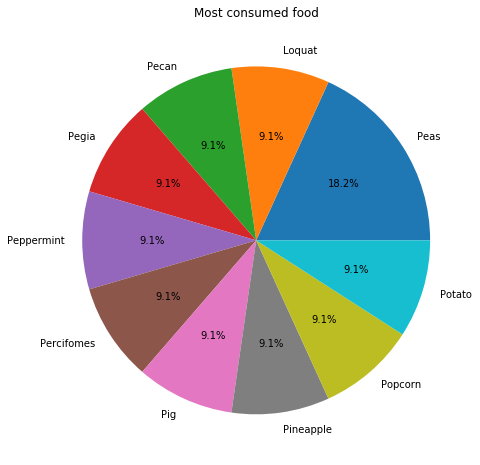

In [32]:
#Group data by food name
#Group data by allergy
grouped = Food_data_file_df.groupby(["Food", "Allergy"]).size().reset_index(name="count")
grouped = grouped[grouped["count"]>0]
grouped = grouped.groupby(["Food"])["count"].sum().reset_index(name="Total Count")

# sort the data by total count in descending order
grouped = grouped.sort_values('Total Count', ascending=False)

# create a pie chart of the top 10 food types with the highest total count of allergies
top10 = grouped.head(10)
plt.figure(figsize=(12,8))
plt.pie(top10['Total Count'], labels=top10['Food'], autopct='%1.1f%%')
plt.title("Most consumed food")
plt.show()

In [179]:
# Used Api Key
spoon_apikey = "ebf0e3aefed5490480fa19d4a2ad3b7e"
# User inputs food they wish to search for: ex. Meatloaf
common_food = input("Pick a food you'd like to evaluate: ")
quantity = "5"
base_url = f"https://api.spoonacular.com/recipes/complexSearch?apiKey={spoon_apikey}\
&query={common_food}&usedIngredients=true&number={quantity}"

sptc_data = requests.get(base_url).json()
recipe_ids = []
recipe_names = []
# Pull 5 recipes related to search food. Isolate IDs and Recipe Names for next part of user selection.
for x in range(len(sptc_data)+1):
    recipe_ids.append(sptc_data['results'][x]['id'])
    id_number = sptc_data['results'][x]['id']
    recipe_names.append(sptc_data['results'][x]['title'])
    name = sptc_data['results'][x]['title']
    print(f"{x+1}. {name}")

Pick a food you'd like to evaluate: meatloaf
1. Veggie Meatloaf
2. German Meatloaf Falscher Hase
3. Italian Meatloaf with Hard Boiled Eggs
4. Venison Meatloaf with Blackberry BBQ Sauce and Buffalo Sweet Potato/Pumpkin Hash
5. Homemade Meatloaf (Like Grandma Made!)


In [180]:
# User selects which recipe to evaluate for allergens
user_input = input("Please select which recipe you'd like to evaluate (1, 2, 3, 4, 5): ")
print("--------------------------------------------------------------------")
for x in user_input:
    user_pick = recipe_ids[int(x)-1]

recipe_url = f"https://api.spoonacular.com/recipes/{user_pick}\
/information?apiKey={spoon_apikey}&includeIngredients=true"

ingredient_data = requests.get(recipe_url).json()
print(f"*{ingredient_data['title']}*")
print("-"*len(ingredient_data['title']))

final_ingredients = []
# Ingredients Api will pull a full ingredients list for the selected recipe, saved above
for y in range(len(ingredient_data["extendedIngredients"])):
    if ingredient_data["extendedIngredients"][y]["nameClean"] != \
      ingredient_data["extendedIngredients"][y-1]["nameClean"]:
        ingredient = ingredient_data["extendedIngredients"][y]["nameClean"]
        final_ingredients.append(ingredient)
        print(ingredient)
    else:
        next     

Please select which recipe you'd like to evaluate (1, 2, 3, 4, 5): 5
--------------------------------------------------------------------
*Homemade Meatloaf (Like Grandma Made!)*
--------------------------------------
bell pepper
golden brown sugar
egg
95 percent lean ground beef
cooked bacon
ginger
ketchup
milk
onion
black pepper
table salt
saltine crackers


In [182]:
# Created a list of all foods in the DataFrame for easy use
food_list = Food_data_file_df["Food"].tolist()
flagged_allergy = []
flagged_food = []

# Comparing ingredients for the searched food with food allergen DataFrame and pulling the respective allergens
for food in final_ingredients:
    food = str(food).capitalize()
    if food in food_list:
        tested_allergy = Food_data_file_df[Food_data_file_df['Food']==food]['Allergy'].values[0]
        tested_allergy = str(tested_allergy)
        if tested_allergy != "nan":
            flagged_allergy.append(tested_allergy)
            flagged_food.append(food)
            
semiLastAllergy = ', '.join(flagged_allergy[:-1])
lastAllergy = flagged_allergy[-1]
semiLastFood = ', '.join(flagged_food[:-1])
lastFood = flagged_food[-1]

print(f"[{ingredient_data['title']}] contain {len(flagged_food)} ingredients with \
potential allergens. They are: {' & '.join([semiLastFood, lastFood])}.")
print()
print(f"The potential allergens are: {' & '.join([semiLastAllergy, lastAllergy])}.")
        

[Homemade Meatloaf (Like Grandma Made!)] contain 3 ingredients with potential allergens. They are: Ginger, Milk & Onion.

The potential allergens are: Histamine Allergy, Milk allergy / Lactose intolerance & Allium Allergy.
